<a href="https://colab.research.google.com/github/ccrsypherd/FoxFarm/blob/main/Final_OriginalData_33RFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nilearn
import torch
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from nilearn.connectome import ConnectivityMeasure
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import RFE

# Mount Google Drive
drive.mount('/content/gdrive')

# Define the paths to the data folders
data_dir = '/content/gdrive/MyDrive/ds18/smalldense/'
class_folders = os.listdir(data_dir)

# Initialize empty lists for data and labels
original_data = []
original_labels = []

# Loop over the class folders
for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(data_dir, class_folder)
    file_names = os.listdir(class_path)

    # Initialize empty lists to hold the data and labels for this class
    class_data = []
    class_labels = []

    # Loop over the files in the class folder
    for file_name in file_names:
        if file_name.endswith('.dot'):
            file_path = os.path.join(class_path, file_name)
            with open(file_path, 'r') as f:
                file_contents = np.load(file_path)
                # Append the file contents to the data list for this class
                class_data.append(file_contents)
                # Append the class label to the labels list for this class
                class_labels.append(i)

    # Convert the data and labels for this class to numpy arrays and append them to the global data and labels lists
    original_data.append(np.array(class_data))
    original_labels.append(np.array(class_labels))

# Convert the data and labels to numpy arrays and concatenate them along the first axis (rows)
original_data = np.concatenate(original_data, axis=0)
original_labels = np.concatenate(original_labels, axis=0)

# Flatten each correlation matrix into a one-dimensional array
feature_vectors = original_data.reshape(original_data.shape[0], -1)
print(feature_vectors.shape)
del original_data

###### Applying SVM Directly to the Flattened Matrices of 900301 #####

# Define kernel values to loop over
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_vectors, original_labels, test_size=0.2, random_state=42)
del feature_vectors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(30, 9006001)


In [2]:

# Create an SVM model
svm = SVC(kernel='linear')

# Create an RFE object with 30 desired features
rfe = RFE(estimator=svm, n_features_to_select=33, step=900000, verbose=1)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Print the selected features
#print('Selected features:', rfe.support_)

# Get selected features
selected_features = X_train[:,rfe.support_ == True]

# Train SVM on selected features
svm = SVC(kernel='linear', C=1)
svm.fit(selected_features, y_train)

# Evaluate SVM classifier on training data
train_accuracy = svm.score(selected_features, y_train)

# Evaluate on test set
X_test_selected = X_test[:,rfe.support_ == True]
test_accuracy = svm.score(X_test_selected, y_test)


Fitting estimator with 9006001 features.
Fitting estimator with 8106001 features.
Fitting estimator with 7206001 features.
Fitting estimator with 6306001 features.
Fitting estimator with 5406001 features.
Fitting estimator with 4506001 features.
Fitting estimator with 3606001 features.
Fitting estimator with 2706001 features.
Fitting estimator with 1806001 features.
Fitting estimator with 906001 features.
Fitting estimator with 6001 features.


In [3]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import numpy as np

# Set number of iterations
n_iter = 1

# Create an SVM model
svm = SVC(kernel='linear')

# Create an RFE object with 33 desired features
rfe = RFE(estimator=svm, n_features_to_select=33, step=900000, verbose=1)

# Initialize arrays to store accuracy values
train_accuracy = np.zeros(n_iter)
test_accuracy = np.zeros(n_iter)

# Repeat for n_iter iterations
for i in range(n_iter):
    # Fit the RFE object to the training data
    rfe.fit(X_train, y_train)

    # Get selected features
    selected_features = X_train[:, rfe.support_ == True]

    # Train SVM on selected features
    svm = SVC(kernel='linear', C=1)
    svm.fit(selected_features, y_train)

    # Evaluate SVM classifier on training data
    train_accuracy[i] = svm.score(selected_features, y_train)

    # Evaluate on test set
    X_test_selected = X_test[:, rfe.support_ == True]
    test_accuracy[i] = svm.score(X_test_selected, y_test)

# Calculate mean and standard deviation of accuracy over iterations
mean_train_accuracy = np.mean(train_accuracy)
std_train_accuracy = np.std(train_accuracy)
mean_test_accuracy = np.mean(test_accuracy)
std_test_accuracy = np.std(test_accuracy)

# Print results
print("Training accuracy: %.2f%% (+/- %.2f%%)" % (mean_train_accuracy*100, std_train_accuracy*100))
print("Testing accuracy: %.2f%% (+/- %.2f%%)" % (mean_test_accuracy*100, std_test_accuracy*100))



Fitting estimator with 9006001 features.
Fitting estimator with 8106001 features.
Fitting estimator with 7206001 features.
Fitting estimator with 6306001 features.
Fitting estimator with 5406001 features.
Fitting estimator with 4506001 features.
Fitting estimator with 3606001 features.
Fitting estimator with 2706001 features.
Fitting estimator with 1806001 features.
Fitting estimator with 906001 features.
Fitting estimator with 6001 features.
Training accuracy: 100.00% (+/- 0.00%)
Testing accuracy: 83.33% (+/- 0.00%)


In [4]:
print(test_accuracy)

[0.83333333]


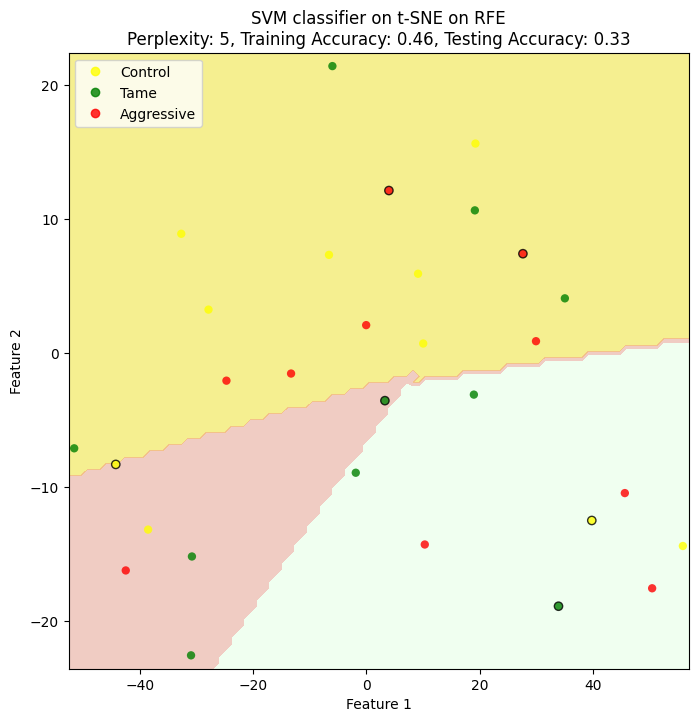

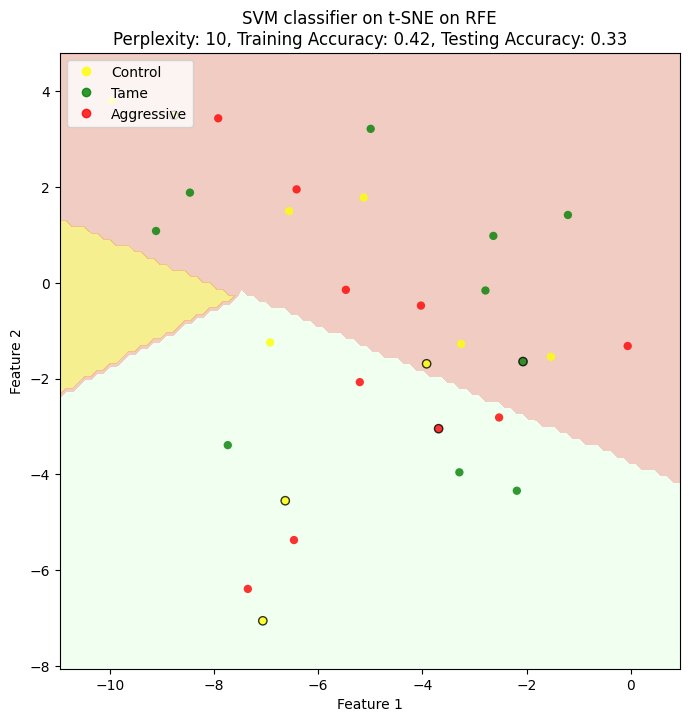

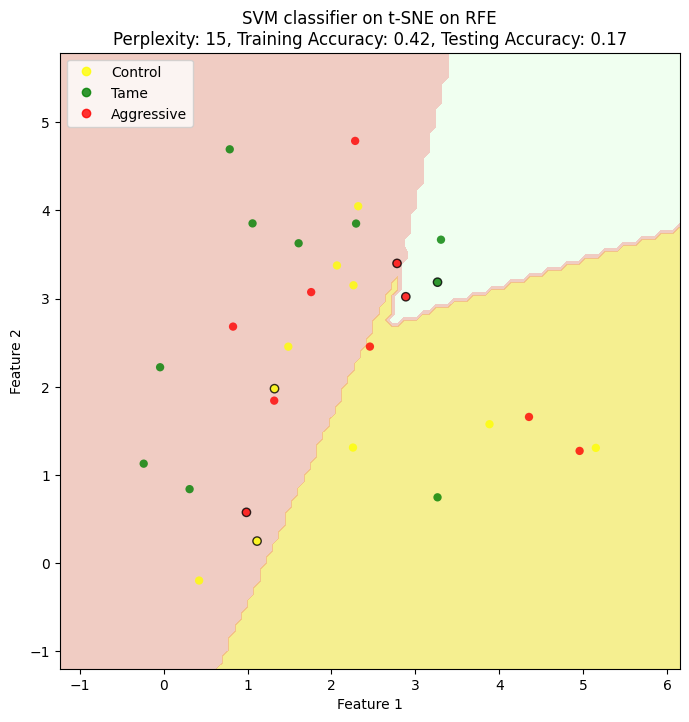

In [15]:
# Define colors for each class
colors = ['yellow', 'green', 'red']
class_labels = ['Control', 'Tame', 'Aggressive']

# Define perplexity and kernel values to loop over
kernel =['linear']
perplexities = [5, 10, 15]

feature_vectors = np.concatenate([selected_features, X_test_selected], axis=0)
labels = np.concatenate([y_train, y_test], axis=0)

for perplexity in perplexities:
  # Perform t-SNE
  tsne = TSNE(n_components=2, perplexity=perplexity, random_state = 1)
  X_2d = tsne.fit_transform(feature_vectors)
  
  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_2d, labels, test_size=0.2)        

  # Train SVM on selected features
  svm = SVC(kernel='linear', C=1)
  svm.fit(X_train, y_train)

  # Evaluate SVM classifier on training data
  train_accuracy = svm.score(X_train, y_train)

  # Evaluate SVM classifier on testing data
  test_accuracy = svm.score(X_test, y_test)

  # Plot decision boundary and scatter plot
  xx, yy = np.meshgrid(np.linspace(X_2d[:, 0].min()-1, X_2d[:, 0].max()+1, 100), np.linspace(X_2d[:, 1].min()-1, X_2d[:, 1].max()+1, 100))
  Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.figure(figsize=(8, 8))
  plt.gca().set_facecolor('honeydew') # set background color
  plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['forestgreen','gold','lightblue','lightcoral','gray']), levels=[-1,0,1])
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('SVM classifier on t-SNE on RFE\nPerplexity: {}, Training Accuracy: {:.2f}, Testing Accuracy: {:.2f}'.format(perplexity, train_accuracy, test_accuracy))

  scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(colors), alpha=0.8, edgecolors='none')
  scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(colors), alpha=0.8, edgecolors='k')
        
  handles_train, labels_train = scatter_train.legend_elements()
  handles_test, labels_test = scatter_test.legend_elements()
  plt.legend(handles_train + handles_test, class_labels, loc='upper left')

  # Save figure to file
  plt.savefig('ODataYesRFE_perp{}.png'.format(perplexity))